>colab에서 작성되었습니다! 

**통계적 분석을 위한 라이브러리: statsmodels , scipy **












>데이터를 가져와서 작업해 보아요!
---

[데이터를 가져오는 대표적인 방법]

-원하는 데이터가 담긴 엑셀 파일을 다운

**-금융 데이터 수집 라이브러리 이용(가격 정보)**

-웹크롤링

In [ ]:
pip install -U finance-datareader #외부 라이브러리의 경우 설치를 해주어야 import 해 올 수 있다.

In [ ]:
import FinanceDataReader as fdr #금융 데이터 수집 라이브러리
import pandas as pd
import time

**Capital Asset Pricing Model(CAPM)**

개별자산수익률 <- 개별자산가격에서 수익률 계산 ->삼성전자


무위험자산수익률 <- 무위험자산의 대용치 가격을 찾고, 수익률 계산 ->KODEX 단기자금(ETF)


시장수익률 <- 시장의 대용치 가격을 찾고, 수익률계산->코스피지수



In [ ]:
s1 = fdr.DataReader('005930','2019')
s1.head()

In [ ]:
k1 = fdr.DataReader('KS11', '2019')
k1.head()

In [ ]:
r1 = fdr.DataReader('153130', '2019')
r1.head()

In [ ]:
market_riskpremium= k1['Change']-r1['Change']
stock_excessreturn = s1['Change']-r1['Change']

In [ ]:
#회귀 분석
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(market_riskpremium) #상수항을 만들어주기 위해 add_constant() 사용
model = sm.OLS(stock_excessreturn, x).fit() #(y,x )형태


In [ ]:
model.summary()

In [ ]:
#모델의 계수 보기

const = model.params[0] # 절편
beta = model.params[1] # 기울기

print("const=", const.round(4), "beta=", beta.round(4))

In [ ]:
import scipy.stats as stats
model2 = stats.linregress(market_riskpremium,stock_excessreturn)
print(model2)


In [ ]:
print(model2.slope)
print(model2.intercept)

In [ ]:
#산점도(scatter plot) + 회귀식(regression line) 시각화

x_line = np.linspace(k1['Change'].min(), k1['Change'].max(), 100) #회귀식을 그리기 위해 x값을 만들어요
# np.linspace(시작값, 끝값, num) -> 시작값과 끝값 사이 num개의 수를 일정한 간격으로 생성
y_line = x_line*beta + const

plt.scatter(market_riskpremium, stock_excessreturn)
plt.plot(x_line, y_line, color='red')
plt.xlabel('market_premium(%)')
plt.ylabel('excess_stockreturn(%)')
plt.legend(['Regression Line', 'Plot'])

 **데이터 시각화 라이브러리 matplotlib**








**<기본 틀>**

plt.title("제목 입력")

 *함수로 원하는 유형의 그래프 생성* 

plt.xlabel('x축 설명')

plt.ylabel('y축 설명')

plt.legend([a,b]) #범례 입력

plt.show()



---



**line plot 함수**

plt.plot(x, y)


---


**scatter plot 함수**

plt.scatter(x, y)


---


**bar chart 함수**

plt.bar(x, y)





In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#line plot
#이차 함수
x = np.arange(0, 100, 1)
y = x*x
plt.plot(x, y)

In [ ]:
#마커 사용법 plot 함수 마지막에 색과 마커 모양 지정
import numpy as n
x = np.random.uniform(0,2,50)
y = np.random.uniform(0,2,50)
plt.scatter(x,y, color='blue', marker='^')


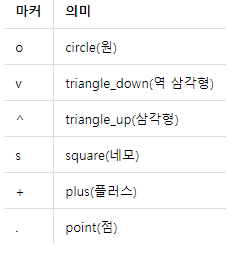

In [ ]:
#중첩도 가능합니다
x = np.arange(0, 100, 2)
y = x*x
plt.plot(x, y,color='orange')
x1 = np.random.uniform(0,100,50)
y1 = np.random.uniform(0,y.max(),50)
plt.scatter(x1,y1, color='purple', marker='*')
x2 = np.arange(0, 100, 2)
y2 = np.random.uniform(y.min(),y.max(),len(x1)) # random한 수 추출
plt.bar(x2,y2, color='green')

In [ ]:
# n 개의 그래프 찍어내기-> Figure 객체 생성해야함!

x = np.arange(0.0, 2 * np.pi, 0.1)
sin_y = np.sin(x)
cos_y = np.cos(x)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(x, sin_y, 'b--')
ax2.plot(x, cos_y, 'r--')

plt.show()

In [ ]:
# 창의 크기를 다르게 하고 싶을 때
fig = plt.figure(figsize=(12, 8))
a1 = plt.subplot2grid((4,4), (0,0), rowspan=2, colspan=2)
a2 = plt.subplot2grid((4,4), (0,2), rowspan=2, colspan=2)
a3 = plt.subplot2grid((4,4), (2,0), rowspan=2, colspan=4)
plt.show()

>데이터를 가져와서 작업해 보아요!
---

[데이터를 가져오는 대표적인 방법]

-원하는 데이터가 담긴 엑셀 파일을 다운

-금융 데이터 수집 라이브러리 이용(가격 정보)

**-웹크롤링**

In [ ]:
#필요한 모듈, 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import bs4

In [ ]:
def price_naver(symbol, timeframe, count):
    
    #making url
    
    url_a = 'https://fchart.stock.naver.com/sise.nhn?requestType=0'
    url_insert =  url_a+'&symbol='+symbol+'&timeframe='+timeframe+'&count='+count

    #convert into bs(beautifulsoup) object
    
    price_raw = requests.get(url_insert)
    price_bs = bs4.BeautifulSoup(price_raw.text, 'lxml')
    price_list = price_bs.find_all('item')
    
    #empty sheets
    
    date_list = []
    open_list = []
    high_list = []
    low_list = []
    close_list = []
    volume_list = []
    
    #split the data into date/open/high/low/close/volume
    #close - 차트에서 끌어오기 때문에 수정종가로 자동반영
    
    for piece in price_list:
        temp = piece['data']
        dp = temp.split('|')
        
        date_list.append(dp[0])
        open_list.append(dp[1])
        high_list.append(dp[2])
        low_list.append(dp[3])
        close_list.append(dp[4])
        volume_list.append(dp[5])
    
    #dataframe으로 합치기
    
    dp_to_df = pd.DataFrame({'open': open_list, 'high': high_list, 'low': low_list, 'close': close_list, 'vol': volume_list}, index=date_list)
    dp_to_df = dp_to_df.astype(float)
    
    return dp_to_df

ㄴ크롤링 사이트 정보에 대한 코멘트 




```
네이버 증권-> 개별 종목 페이지-> 차트에 로드된 데이터를 가져온 것입니다. 

개별 종목 차트 페이지에서 개발자 도구(f12)-> Network 들어가시면 아래 쪽에 https://fchart.stock.naver.com/sise.nhn?symbol=종목코드&timeframe=day&count=500&requestType=0 이 있고

 이 안에 데이터가 "일자 | 시가 | 고가 | 저가 | 종가 | 거래량 " 형식의 문자열로 바인딩되어 있는 것을 확인할 수 있습니다.
```






In [ ]:
sk_raw = price_naver('069500', 'day', '1000')


In [ ]:
type(sk_raw)

In [ ]:
sk_raw.head()

In [ ]:
ma5 = pd.DataFrame(sk_raw['close'].rolling(window=5).mean())
ma20 = pd.DataFrame(sk_raw['close'].rolling(window=20).mean())
ma60 = pd.DataFrame(sk_raw['close'].rolling(window=60).mean())
ma120 = pd.DataFrame(sk_raw['close'].rolling(window=120).mean())
sk_raw['5일']=  ma5
sk_raw['20일']=  ma20
sk_raw['60일']=  ma60
sk_raw['120일']=  ma120

In [ ]:
sk_ret = sk_raw.close.pct_change()[1:]

In [ ]:
sk_raw['sk_ret']=sk_ret

In [ ]:
sk_raw

In [ ]:
sk_raw=sk_raw.dropna() # 앞서 pandas에서 다룬 결측치 처리.dropna()!

In [ ]:
sk_raw

In [ ]:
fig = plt.figure(figsize=(20, 10))
pr_line = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4,)
vol_bar = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
#이평선
pr_line.plot(sk_raw.index, sk_raw['5일'], label='MA5')
pr_line.plot(sk_raw.index, sk_raw['20일'], label='MA20')
pr_line.plot(sk_raw.index, sk_raw['60일'], label='MA60')
pr_line.plot(sk_raw.index, sk_raw['120일'], label='MA120',color='purple' )

#캔들
pr_line.bar( sk_raw.index, height=sk_raw['close']-sk_raw['open'], bottom=sk_raw['open'], width=1, color= list(map(lambda c: 'red' if c >0 else 'blue', sk_raw['sk_ret'])))
pr_line.vlines( sk_raw.index, sk_raw['low'], sk_raw['high'],  color= list(map(lambda c: 'red' if c >0 else 'blue', sk_raw['sk_ret'])))
#matplotlib.pyplot.vlines(x, ymin, ymax) vertical line을 그려주어요!

'''
-color에 들어간 함수의 의미: +인 날은 빨간색으로 -인 날은 파란색으로 표시하도록 하는 함수를 sk_raw['sk_ret']에 모두 적용하고 list로 반환
-lambda는 함수를 한 줄로 정의하여 바로 실행할 수 있게 해줍니다.
  형태
  lambda 인수 : 리턴값을 도출하는 방식을 정의
-map은 반복가능한 자료형을 입력으로 받아, 지정된 함수로 처리해서 반환합니다.
  형태
  map(함수,반복 가능한 자료형)

'''
vol_bar.bar(sk_raw.index,  sk_raw['vol'])
#plt.legend(loc='best')
plt.show()



**고생하셨습니다 :)**
>참고 자료: 

모두를 위한 파이썬 프로그래밍 강의 자료

파이썬으로 배우는 알고리즘 트레이딩 https://wikidocs.net/book/110

지난 학기 세션   